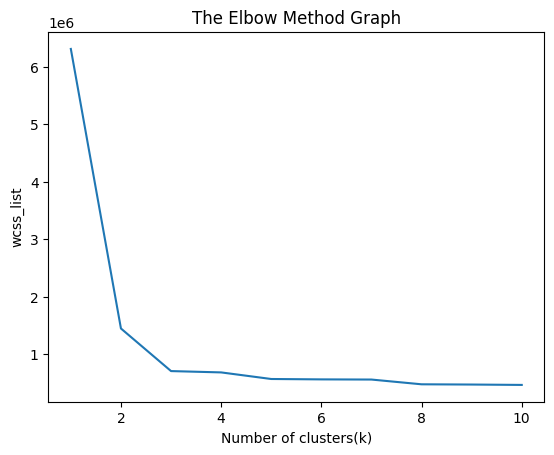

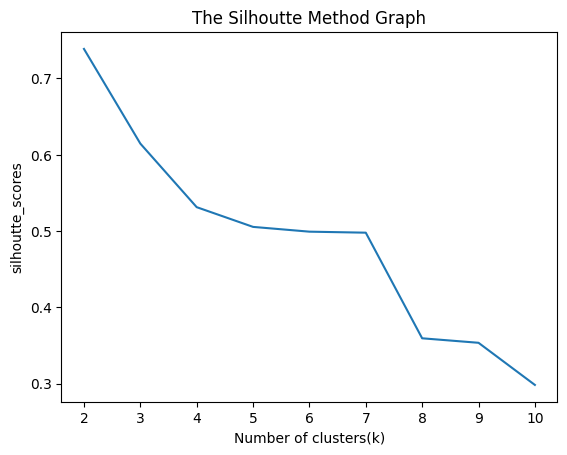

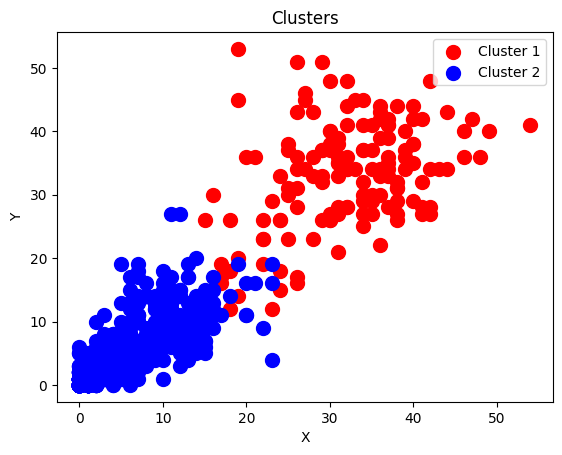

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing Dataset
dataset = pd.read_csv('transactions.csv')
X = dataset.iloc[:, 1:].values

# No missing values

# No need to split into training and test

# Validating K 
wcss = [] 
silhoutte_scores = []

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)  

    if(i != 1): 
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhoutte_scores.append(silhouette_avg)


# Plot for Elbow Method
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

# Plot for Silhoutte Method
plt.plot(range(2, 11), silhoutte_scores)
plt.title('The Silhoutte Method Graph') 
plt.xlabel('Number of clusters(k)')
plt.ylabel('silhoutte_scores')
plt.show()


# Training Model
kmeans_final = KMeans(n_clusters = 2, init='k-means++', random_state=42)
y = kmeans_final.fit_predict(X)

# Visualising Clusters
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
